In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import ranksums
from scipy.stats import ttest_1samp
from scipy.stats import median_abs_deviation
from scipy.io import savemat
import os

import sys
plotDir = 'excitabilityPlots'
try: 
    os.mkdir(plotDir)
except FileExistsError:
    pass
from help_funcs import *

In [2]:
plotDataDir = 'compiled_data'
try: 
    os.mkdir(plotDataDir)
except FileExistsError:
    pass

In [3]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

In [4]:
def get_slope(m,C,n,k):
    cvals = np.arange(0.02,0.33,0.01)
    yvals = naka_rushton(cvals, m, C, n, k)
    
    slopes = []
    for i in range(1, len(cvals)):
        slopes.append((yvals[i]-yvals[i-1])/0.01)
    maxslope = np.max(slopes)
    return maxslope, cvals[slopes.index(maxslope)]

In [5]:
sstcolor = (0.898,0.6314,0.0039)
pvcolor = (0.0, 0.4039, 0.7059)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns

alpha = 0.07
	pfar = 0.2
		seed 1
t90_a0.07_pf0.2 1 PV 0.02 not found.
		seed 2
t90_a0.07_pf0.2 2 PV 0.02 not found.
		seed 3
t90_a0.07_pf0.2 3 PV 0.02 not found.
		seed 4
t90_a0.07_pf0.2 4 PV 0.02 not found.
		seed 5
t90_a0.07_pf0.2 5 PV 0.02 not found.
		seed 6
t90_a0.07_pf0.2 6 PV 0.02 not found.
		seed 7
t90_a0.07_pf0.2 7 PV 0.02 not found.
		seed 8
t90_a0.07_pf0.2 8 PV 0.02 not found.
		seed 9
t90_a0.07_pf0.2 9 PV 0.02 not found.


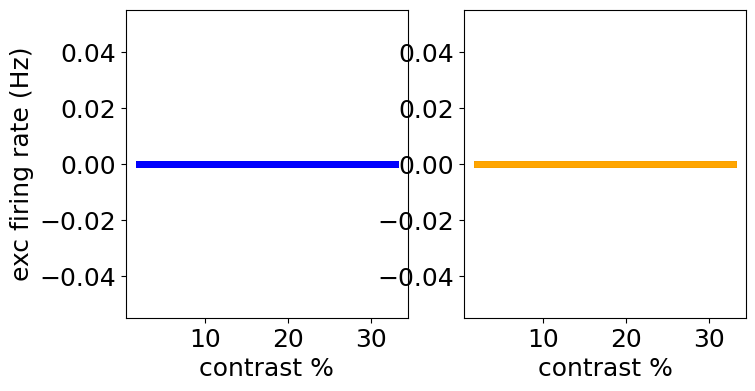

/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
posx and posy should be finite values
posx and posy should be finite values


nan


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


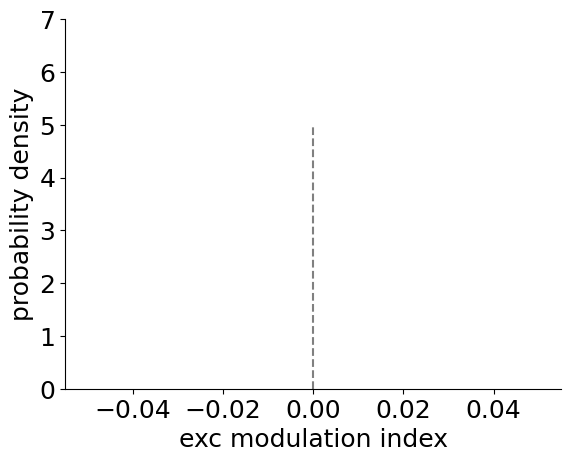

PV_median=nan PV_mad=nan
SST_median=nan SST_mad=nan


FileNotFoundError: [Errno 2] No such file or directory: 'RespFig1B_data/contrast_curves_pfar0.2.mat'

In [6]:
# simname = 'archive/base3t'
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
# contrasts = np.array([0.02, 0.05, 0.1, 0.18])
ignor=1
# binlen = 20
# numseeds = 10
numseeds = 9
di=0
delay = 200
binlen = 200
# for delay in [0,10,20,30,40,50]:
ct = 'exc'
if ct == 'exc':
    pi=0
elif ct == 'sst':
    pi=2
    
nr=6 # no. repeats

fig,axes = plt.subplots(1,2,figsize = (8,4))

alpha_list = [0.07]
pfar_list = [0.2]

PV_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))

cvals = np.arange(0.02,0.33,0.001)
num_cvals = len(cvals)

all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
all_stim_pv_curves =np.zeros((numseeds,num_cvals))
all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
all_stim_sst_curves=np.zeros((numseeds,num_cvals))
contrast_curves={}


for ai in range(len(alpha_list)):
    alpha = alpha_list[ai]
    print(f'alpha = {alpha}')
    for pfi in range(len(pfar_list)):
        pfar = pfar_list[pfi]
        print(f'\tpfar = {pfar}')
        simname = 't90_a%s'%alpha + '_pf%s'%pfar
#         print(simname)
        all_conditions = []
# for simname in ['alpha0.04_pfar0.1']:
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)
        
        ctrl_pv_ave_curve = np.zeros(num_cvals)
        stim_pv_ave_curve = np.zeros(num_cvals)
        ctrl_sst_ave_curve = np.zeros(num_cvals)
        stim_sst_ave_curve = np.zeros(num_cvals)
        

        for seed in range(1,numseeds+1):
            print(f'\t\tseed {seed}')
            # contrasts = np.array([0.02, 0.05, 0.2, 0.3])
            # contrasts = np.array([0.02,  0.2])
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = 'data/%s/results_%s/'%(simname, seed)
#             print(folder)
            not_all_found=False
            for cont in contrasts:
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'PV', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen, nrepeats=nr)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen, nrepeats=nr)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen, nrepeats=nr)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen, nrepeats=nr)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'SST', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen, nrepeats=nr)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


                ctrl_pv_ave += ctrlpv_A_mean
                stim_pv_ave += stimpv_A_mean
                ctrl_sst_ave += ctrlsst_A_mean
                stim_sst_ave += stimsst_A_mean

            if not_all_found:
                continue

            condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
            condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:])

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        #     slope_cp = C_cp*n_cp/k_cp/4.0
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)

            if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
                slope_sp = 0
                m_sp = 0
                C_sp = 0
                n_sp = 0
                k_sp = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
                m_sp, C_sp, n_sp, k_sp = params
                m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            #     slope_sp = C_sp*n_sp/k_sp/4.0
                slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
        #     slope_cs = C_cs*n_cs/k_cs/4.0
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
                slope_ss = 0
                m_ss = 0
                C_ss = 0
                n_ss = 0
                k_ss = 0
            else:
#                 print(f'stim_sst_curve = {stim_sst_curve[pi][ignor:]}')
#                 print(f'stim_sst_curve_e = {stim_sst_curve_e[pi][ignor:]}')
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
                m_ss, C_ss, n_ss, k_ss = params
                m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
            #     slope_ss = C_ss*n_ss/k_ss/4.0
                slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


        #     if np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) >50: continue
            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)

#             print(m_ss, C_ss, n_ss, k_ss)

#             print(slope_cp, slope_sp, slope_cs, slope_ss, np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) )

            scal = 1
            # scal = 50
#             cvals = np.arange(0.02,0.33,0.001)
#             fig,axes = plt.subplots(1,2,figsize = (8,4))
#             axes[0].scatter(contrasts*100, np.array(ctrl_pv_curve[pi])*scal, c='black')
#             axes[0].scatter(contrasts*100, np.array(stim_pv_curve[pi])*scal, c='blue')
            yvals = naka_rushton(cvals, m_cp, C_cp, n_cp, k_cp)
    
# all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
# all_stim_pv_curves =np.zeros((numseeds,num_cvals))
# all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
# all_stim_sst_curves=np.zeros((numseeds,num_cvals))
            all_ctrl_pv_curves[seed-1,:] = yvals*scal
            ctrl_pv_ave_curve += yvals*scal
            
            
            axes[0].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
            if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
                yvals = np.zeros(len(cvals))
            else:
                yvals = naka_rushton(cvals, m_sp, C_sp, n_sp, k_sp)
            
            stim_pv_ave_curve += yvals*scal
            all_stim_pv_curves[seed-1,:] = yvals*scal
            
            axes[0].plot(cvals*100, yvals*scal, c='blue',linewidth=0.5,alpha=0.5)

#             axes[1].scatter(contrasts*100, np.array(ctrl_sst_curve[pi])*scal, c='black')
#             axes[1].scatter(contrasts*100, np.array(stim_sst_curve[pi])*scal, c='orange')
            yvals = naka_rushton(cvals, m_cs, C_cs, n_cs, k_cs)
#             print(f'm_cs = {m_cs}')
            
            ctrl_sst_ave_curve += yvals*scal
            all_ctrl_sst_curves[seed-1,:] = yvals*scal
            
            axes[1].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
            if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
                yvals = np.zeros(len(cvals))
            else:
                yvals = naka_rushton(cvals, m_ss, C_ss, n_ss, k_ss)
#             print(f'm_ss = {m_ss}')
            stim_sst_ave_curve += yvals*scal
            all_stim_sst_curves[seed-1,:] = yvals*scal
                
            axes[1].plot(cvals*100, yvals*scal, c='orange',linewidth=0.5,alpha=0.5)
            
        contrast_curves['constrast_values'] = cvals*100
        contrast_curves['all_ctrl_pv_curves'] = all_ctrl_pv_curves
        contrast_curves['all_stim_pv_curves'] = all_stim_pv_curves
        contrast_curves['all_ctrl_sst_curves'] = all_ctrl_sst_curves
        contrast_curves['all_stim_sst_curves'] = all_stim_sst_curves
            
#         axes[0].set_ylim([0,65])
#         axes[1].set_ylim([0,65])
        axes[0].set_ylabel(f'{ct} firing rate (Hz)',fontsize=18)
#         axes[1].set_xlabel('contrast \%')
        axes[0].set_xlabel('contrast %',fontsize=18)
        axes[1].set_xlabel('contrast %',fontsize=18)
        
        ctrl_pv_ave_curve = ctrl_pv_ave_curve/numseeds
        stim_pv_ave_curve = stim_pv_ave_curve/numseeds
        ctrl_sst_ave_curve = ctrl_sst_ave_curve/numseeds
        stim_sst_ave_curve = stim_sst_ave_curve/numseeds
        
        axes[0].plot(cvals*100, ctrl_pv_ave_curve, c='black',linewidth=5)
        axes[0].plot(cvals*100, stim_pv_ave_curve, c='blue',linewidth=5)
        axes[1].plot(cvals*100, ctrl_sst_ave_curve, c='black',linewidth=5)
        axes[1].plot(cvals*100, stim_sst_ave_curve, c='orange',linewidth=5)
        
        contrast_curves['ave_ctrl_pv_curve'] = ctrl_pv_ave_curve
        contrast_curves['ave_stim_pv_curve'] = stim_pv_ave_curve
        contrast_curves['ave_ctrl_sst_curve'] = ctrl_sst_ave_curve
        contrast_curves['ave_stim_sst_curve'] = stim_sst_ave_curve
        
#         plt.savefig('a60_pfar0p2_0p35mm_cc.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_cc_alpha{alpha}_pfar{pfar}_{numseeds}seeds_.pdf',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_cc_alpha{alpha}_pfar{pfar}_{numseeds}seeds_.svg',bbox_inches='tight',dpi=200)
        plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_cc.svg',bbox_inches='tight',dpi=200)
        plt.show()
        plt.close()
            

        ctrl_pv_ave = ctrl_pv_ave/100.
        stim_pv_ave = stim_pv_ave/100.
        ctrl_sst_ave = ctrl_sst_ave/100.
        stim_sst_ave = stim_sst_ave/100.
        
        all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


        all_conditions.append(all_slopes)
        di =0
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]
        
        PV_changes = []
        for ii in range(len(slopes_cp)):
            PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

        SST_changes = []
        for ii in range(len(slopes_cs)):
            SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )


        bins = np.arange(-1.025,1.0, 0.05)
        fig, ax = plt.subplots()
        ax.hist(PV_changes, bins=bins, facecolor=pvcolor, alpha=0.2, rwidth=0.8, density=True)
        ax.hist(SST_changes, bins=bins, facecolor=sstcolor, alpha=0.2, rwidth=0.8, density=True)
        ax.plot([0,0],[0,5], '--', c='gray')
        ax.set_xlabel(f'{ct} modulation index',fontsize=18)
        ax.set_ylabel('probability density',fontsize=18)
#         ax.arrow( np.median(PV_changes), 3 , 0, -0.5, width=0.01)
        ax.vlines(np.median(PV_changes),0,5,linestyle='--',color='blue')
        ax.vlines(np.median(SST_changes),0,5,linestyle='--',color='orange')
        
        stat,pval = ranksums(SST_changes,PV_changes, 'less')
        print(pval)
        if pval < 0.05:
            txt = '**'
        else:
            txt = 'n.s.'
        x1, x2 = np.median(SST_changes), np.median(PV_changes)   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        y, h, col = 6.2, 0.2, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, txt, ha='center', va='bottom', color=col, fontsize=20)
        plt.ylim([0,7])
        sns.despine()
        
        
#         plt.savefig('a40_pfar0p2.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_hist_alpha{alpha}_pfar{pfar}_{numseeds}seeds.pdf',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_hist_alpha{alpha}_pfar{pfar}_{numseeds}seeds.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_hist.pdf',bbox_inches='tight',dpi=200)
        plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_hist.svg',bbox_inches='tight',dpi=200)
        plt.show()
        plt.close()
        
#         print("MEDIAN:",np.median(PV_changes),np.median(SST_changes))
        PV_median = np.median(PV_changes)
        PV_mad = median_abs_deviation(PV_changes)
        SST_median = np.median(SST_changes)
        SST_mad = median_abs_deviation(SST_changes)
    
        print(f'PV_median={PV_median}',f'PV_mad={PV_mad}')
        print(f'SST_median={SST_median}',f'SST_mad={SST_mad}')
            
savemat(f"RespFig1B_data/contrast_curves_pfar{pfar}.mat",contrast_curves)

# axes[0].set_ylim([0,65])
# axes[1].set_ylim([0,65])
# axes[0].plot(cvals*100, ctrl_pv_ave_curve, c='black',linewidth=5)
# axes[0].plot(cvals*100, stim_pv_ave_curve, c='blue',linewidth=5)
# axes[1].plot(cvals*100, ctrl_sst_ave_curve, c='black',linewidth=5)
# axes[1].plot(cvals*100, stim_sst_ave_curve, c='orange',linewidth=5)

# alpha_list = [0.08]
# pfar_list = [0.2]

# plt.savefig('a80_pfar0p2_0p35mm_cc.png',bbox_inches='tight',dpi=200)
# plt.show()
# plt.close()
histogram={"pv_mis":PV_changes, "sst_mis":SST_changes}
savemat(f"RespFig1B_data/histogram_pfar{pfar}.mat",histogram)
# np.save(f'RespFig1_data/PV_MIs_pfar{pfar}.npy', PV_changes)
# np.save(f'RespFig1_data/SST_MIs_pfar{pfar}.npy', SST_changes)
# np.save(plotDataDir + f'RespFig1_data/PV_MI_sds_0p25_{numseeds}seeds.npy', PV_MI_sds)
# np.save(plotDataDir + f'RespFig1_data/SST_MI_sds_0p25_{numseeds}seeds.npy', SST_MI_sds)

alpha = 0.07
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9


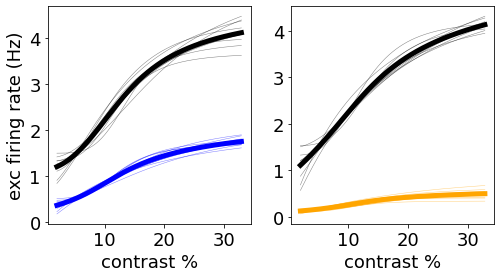

0.0001742875871065265


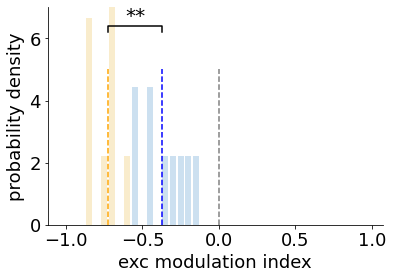

PV_median=-0.3725563046870476 PV_mad=0.14490697450734163
SST_median=-0.721979894956156 SST_mad=0.030752124416884907


In [17]:
# simname = 'archive/base3t'
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
# contrasts = np.array([0.02, 0.05, 0.1, 0.18])
ignor=1
# binlen = 20
# numseeds = 10
numseeds = 9
di=0
delay = 200
binlen = 200
# for delay in [0,10,20,30,40,50]:
ct = 'exc'
if ct == 'exc':
    pi=0
elif ct == 'sst':
    pi=2
    
nr=6 # no. repeats

fig,axes = plt.subplots(1,2,figsize = (8,4))

alpha_list = [0.07]
pfar_list = [0.8]

PV_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))

cvals = np.arange(0.02,0.33,0.001)
num_cvals = len(cvals)

all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
all_stim_pv_curves =np.zeros((numseeds,num_cvals))
all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
all_stim_sst_curves=np.zeros((numseeds,num_cvals))
contrast_curves={}


for ai in range(len(alpha_list)):
    alpha = alpha_list[ai]
    print(f'alpha = {alpha}')
    for pfi in range(len(pfar_list)):
        pfar = pfar_list[pfi]
        print(f'\tpfar = {pfar}')
        simname = 't90_a%s'%alpha + '_pf%s'%pfar
#         print(simname)
        all_conditions = []
# for simname in ['alpha0.04_pfar0.1']:
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)
        
        ctrl_pv_ave_curve = np.zeros(num_cvals)
        stim_pv_ave_curve = np.zeros(num_cvals)
        ctrl_sst_ave_curve = np.zeros(num_cvals)
        stim_sst_ave_curve = np.zeros(num_cvals)
        

        for seed in range(1,numseeds+1):
            print(f'\t\tseed {seed}')
            # contrasts = np.array([0.02, 0.05, 0.2, 0.3])
            # contrasts = np.array([0.02,  0.2])
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = 'data/%s/results_%s/'%(simname, seed)
#             print(folder)
            not_all_found=False
            for cont in contrasts:
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'PV', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen, nrepeats=nr)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen, nrepeats=nr)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen, nrepeats=nr)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen, nrepeats=nr)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'SST', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen, nrepeats=nr)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen, nrepeats=nr)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


                ctrl_pv_ave += ctrlpv_A_mean
                stim_pv_ave += stimpv_A_mean
                ctrl_sst_ave += ctrlsst_A_mean
                stim_sst_ave += stimsst_A_mean

            if not_all_found:
                continue

            condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
            condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:])

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        #     slope_cp = C_cp*n_cp/k_cp/4.0
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)

            if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
                slope_sp = 0
                m_sp = 0
                C_sp = 0
                n_sp = 0
                k_sp = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
                m_sp, C_sp, n_sp, k_sp = params
                m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            #     slope_sp = C_sp*n_sp/k_sp/4.0
                slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
        #     slope_cs = C_cs*n_cs/k_cs/4.0
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
                slope_ss = 0
                m_ss = 0
                C_ss = 0
                n_ss = 0
                k_ss = 0
            else:
#                 print(f'stim_sst_curve = {stim_sst_curve[pi][ignor:]}')
#                 print(f'stim_sst_curve_e = {stim_sst_curve_e[pi][ignor:]}')
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
                m_ss, C_ss, n_ss, k_ss = params
                m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
            #     slope_ss = C_ss*n_ss/k_ss/4.0
                slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


        #     if np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) >50: continue
            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)

#             print(m_ss, C_ss, n_ss, k_ss)

#             print(slope_cp, slope_sp, slope_cs, slope_ss, np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) )

            scal = 1
            # scal = 50
#             cvals = np.arange(0.02,0.33,0.001)
#             fig,axes = plt.subplots(1,2,figsize = (8,4))
#             axes[0].scatter(contrasts*100, np.array(ctrl_pv_curve[pi])*scal, c='black')
#             axes[0].scatter(contrasts*100, np.array(stim_pv_curve[pi])*scal, c='blue')
            yvals = naka_rushton(cvals, m_cp, C_cp, n_cp, k_cp)
    
# all_ctrl_pv_curves =np.zeros((numseeds,num_cvals))
# all_stim_pv_curves =np.zeros((numseeds,num_cvals))
# all_ctrl_sst_curves=np.zeros((numseeds,num_cvals))
# all_stim_sst_curves=np.zeros((numseeds,num_cvals))
            all_ctrl_pv_curves[seed-1,:] = yvals*scal
            ctrl_pv_ave_curve += yvals*scal
            
            
            axes[0].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
            if stim_pv_curve[pi][ignor:] == [0,0,0,0]:
                yvals = np.zeros(len(cvals))
            else:
                yvals = naka_rushton(cvals, m_sp, C_sp, n_sp, k_sp)
            
            stim_pv_ave_curve += yvals*scal
            all_stim_pv_curves[seed-1,:] = yvals*scal
            
            axes[0].plot(cvals*100, yvals*scal, c='blue',linewidth=0.5,alpha=0.5)

#             axes[1].scatter(contrasts*100, np.array(ctrl_sst_curve[pi])*scal, c='black')
#             axes[1].scatter(contrasts*100, np.array(stim_sst_curve[pi])*scal, c='orange')
            yvals = naka_rushton(cvals, m_cs, C_cs, n_cs, k_cs)
#             print(f'm_cs = {m_cs}')
            
            ctrl_sst_ave_curve += yvals*scal
            all_ctrl_sst_curves[seed-1,:] = yvals*scal
            
            axes[1].plot(cvals*100, yvals*scal, c='black',linewidth=0.5,alpha=0.5)
            if stim_sst_curve[pi][ignor:] == [0,0,0,0]:
                yvals = np.zeros(len(cvals))
            else:
                yvals = naka_rushton(cvals, m_ss, C_ss, n_ss, k_ss)
#             print(f'm_ss = {m_ss}')
            stim_sst_ave_curve += yvals*scal
            all_stim_sst_curves[seed-1,:] = yvals*scal
                
            axes[1].plot(cvals*100, yvals*scal, c='orange',linewidth=0.5,alpha=0.5)
            
        contrast_curves['constrast_values'] = cvals*100
        contrast_curves['all_ctrl_pv_curves'] = all_ctrl_pv_curves
        contrast_curves['all_stim_pv_curves'] = all_stim_pv_curves
        contrast_curves['all_ctrl_sst_curves'] = all_ctrl_sst_curves
        contrast_curves['all_stim_sst_curves'] = all_stim_sst_curves
            
#         axes[0].set_ylim([0,65])
#         axes[1].set_ylim([0,65])
        axes[0].set_ylabel(f'{ct} firing rate (Hz)',fontsize=18)
#         axes[1].set_xlabel('contrast \%')
        axes[0].set_xlabel('contrast %',fontsize=18)
        axes[1].set_xlabel('contrast %',fontsize=18)
        
        ctrl_pv_ave_curve = ctrl_pv_ave_curve/numseeds
        stim_pv_ave_curve = stim_pv_ave_curve/numseeds
        ctrl_sst_ave_curve = ctrl_sst_ave_curve/numseeds
        stim_sst_ave_curve = stim_sst_ave_curve/numseeds
        
        axes[0].plot(cvals*100, ctrl_pv_ave_curve, c='black',linewidth=5)
        axes[0].plot(cvals*100, stim_pv_ave_curve, c='blue',linewidth=5)
        axes[1].plot(cvals*100, ctrl_sst_ave_curve, c='black',linewidth=5)
        axes[1].plot(cvals*100, stim_sst_ave_curve, c='orange',linewidth=5)
        
        contrast_curves['ave_ctrl_pv_curve'] = ctrl_pv_ave_curve
        contrast_curves['ave_stim_pv_curve'] = stim_pv_ave_curve
        contrast_curves['ave_ctrl_sst_curve'] = ctrl_sst_ave_curve
        contrast_curves['ave_stim_sst_curve'] = stim_sst_ave_curve
        
#         plt.savefig('a60_pfar0p2_0p35mm_cc.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_cc_alpha{alpha}_pfar{pfar}_{numseeds}seeds_.pdf',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_cc_alpha{alpha}_pfar{pfar}_{numseeds}seeds_.svg',bbox_inches='tight',dpi=200)
        plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_cc.svg',bbox_inches='tight',dpi=200)
        plt.show()
        plt.close()
            

        ctrl_pv_ave = ctrl_pv_ave/100.
        stim_pv_ave = stim_pv_ave/100.
        ctrl_sst_ave = ctrl_sst_ave/100.
        stim_sst_ave = stim_sst_ave/100.
        
        all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


        all_conditions.append(all_slopes)
        di =0
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]
        
        PV_changes = []
        for ii in range(len(slopes_cp)):
            PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

        SST_changes = []
        for ii in range(len(slopes_cs)):
            SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )


        bins = np.arange(-1.025,1.0, 0.05)
        fig, ax = plt.subplots()
        ax.hist(PV_changes, bins=bins, facecolor=pvcolor, alpha=0.2, rwidth=0.8, density=True)
        ax.hist(SST_changes, bins=bins, facecolor=sstcolor, alpha=0.2, rwidth=0.8, density=True)
        ax.plot([0,0],[0,5], '--', c='gray')
        ax.set_xlabel(f'{ct} modulation index',fontsize=18)
        ax.set_ylabel('probability density',fontsize=18)
#         ax.arrow( np.median(PV_changes), 3 , 0, -0.5, width=0.01)
        ax.vlines(np.median(PV_changes),0,5,linestyle='--',color='blue')
        ax.vlines(np.median(SST_changes),0,5,linestyle='--',color='orange')
        
        stat,pval = ranksums(SST_changes,PV_changes, 'less')
        print(pval)
        if pval < 0.05:
            txt = '**'
        else:
            txt = 'n.s.'
        x1, x2 = np.median(SST_changes), np.median(PV_changes)   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
        y, h, col = 6.2, 0.2, 'k'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, txt, ha='center', va='bottom', color=col, fontsize=20)
        plt.ylim([0,7])
        sns.despine()
        
        
#         plt.savefig('a40_pfar0p2.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_hist_alpha{alpha}_pfar{pfar}_{numseeds}seeds.pdf',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/{ct}_hist_alpha{alpha}_pfar{pfar}_{numseeds}seeds.svg',bbox_inches='tight',dpi=200)
#         plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_hist.pdf',bbox_inches='tight',dpi=200)
        plt.savefig(f'excitabilityPlots/RespFig1B_pfar{pfar}_hist.svg',bbox_inches='tight',dpi=200)
        plt.show()
        plt.close()
        
#         print("MEDIAN:",np.median(PV_changes),np.median(SST_changes))
        PV_median = np.median(PV_changes)
        PV_mad = median_abs_deviation(PV_changes)
        SST_median = np.median(SST_changes)
        SST_mad = median_abs_deviation(SST_changes)
    
        print(f'PV_median={PV_median}',f'PV_mad={PV_mad}')
        print(f'SST_median={SST_median}',f'SST_mad={SST_mad}')
            
savemat(f"RespFig1B_data/contrast_curves_pfar{pfar}.mat",contrast_curves)

# axes[0].set_ylim([0,65])
# axes[1].set_ylim([0,65])
# axes[0].plot(cvals*100, ctrl_pv_ave_curve, c='black',linewidth=5)
# axes[0].plot(cvals*100, stim_pv_ave_curve, c='blue',linewidth=5)
# axes[1].plot(cvals*100, ctrl_sst_ave_curve, c='black',linewidth=5)
# axes[1].plot(cvals*100, stim_sst_ave_curve, c='orange',linewidth=5)

# alpha_list = [0.08]
# pfar_list = [0.2]

# plt.savefig('a80_pfar0p2_0p35mm_cc.png',bbox_inches='tight',dpi=200)
# plt.show()
# plt.close()
histogram={"pv_mis":PV_changes, "sst_mis":SST_changes}
savemat(f"RespFig1B_data/histogram_pfar{pfar}.mat",histogram)
# np.save(f'RespFig1_data/PV_MIs_pfar{pfar}.npy', PV_changes)
# np.save(f'RespFig1_data/SST_MIs_pfar{pfar}.npy', SST_changes)
# np.save(plotDataDir + f'RespFig1_data/PV_MI_sds_0p25_{numseeds}seeds.npy', PV_MI_sds)
# np.save(plotDataDir + f'RespFig1_data/SST_MI_sds_0p25_{numseeds}seeds.npy', SST_MI_sds)